Loading best model from EMB64_NG5_CS2_BS64.pth...
✅ Loaded embeddings for 523 words
   Embedding dimension: 64

📊 CIFAR-100 Coverage: 100/100 words in model

EMBEDDING ANALYSIS

EMBEDDING ANALYSIS

Vocabulary: 523  Embedding dim: 64

Similarity stats (100 word sample):
  Mean: 0.4555  Std: 0.1781
  Min: 0.0288  Max: 0.9540

NEAREST NEIGHBORS

Most similar to 'bear':
  elephant         similarity=0.6903
  mouse            similarity=0.6817
  cloud            similarity=0.6584
  giraffe          similarity=0.6565
  ball             similarity=0.6381
  clouds           similarity=0.6352
  bridge           similarity=0.6351
  floor            similarity=0.6292

Most similar to 'elephant':
  flag             similarity=0.7272
  bottle           similarity=0.7051
  bear             similarity=0.6903
  rock             similarity=0.6669
  clouds           similarity=0.6377
  window           similarity=0.6250
  area             similarity=0.6237
  giraffes         similarity=0.6121

Most simi

/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:785: RuntimeWarning: divide by zero encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:785: RuntimeWarning: overflow encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:785: RuntimeWarning: invalid value encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/uti

Saved t-SNE to embeddings_tsne.png

📈 Displaying t-SNE visualization:


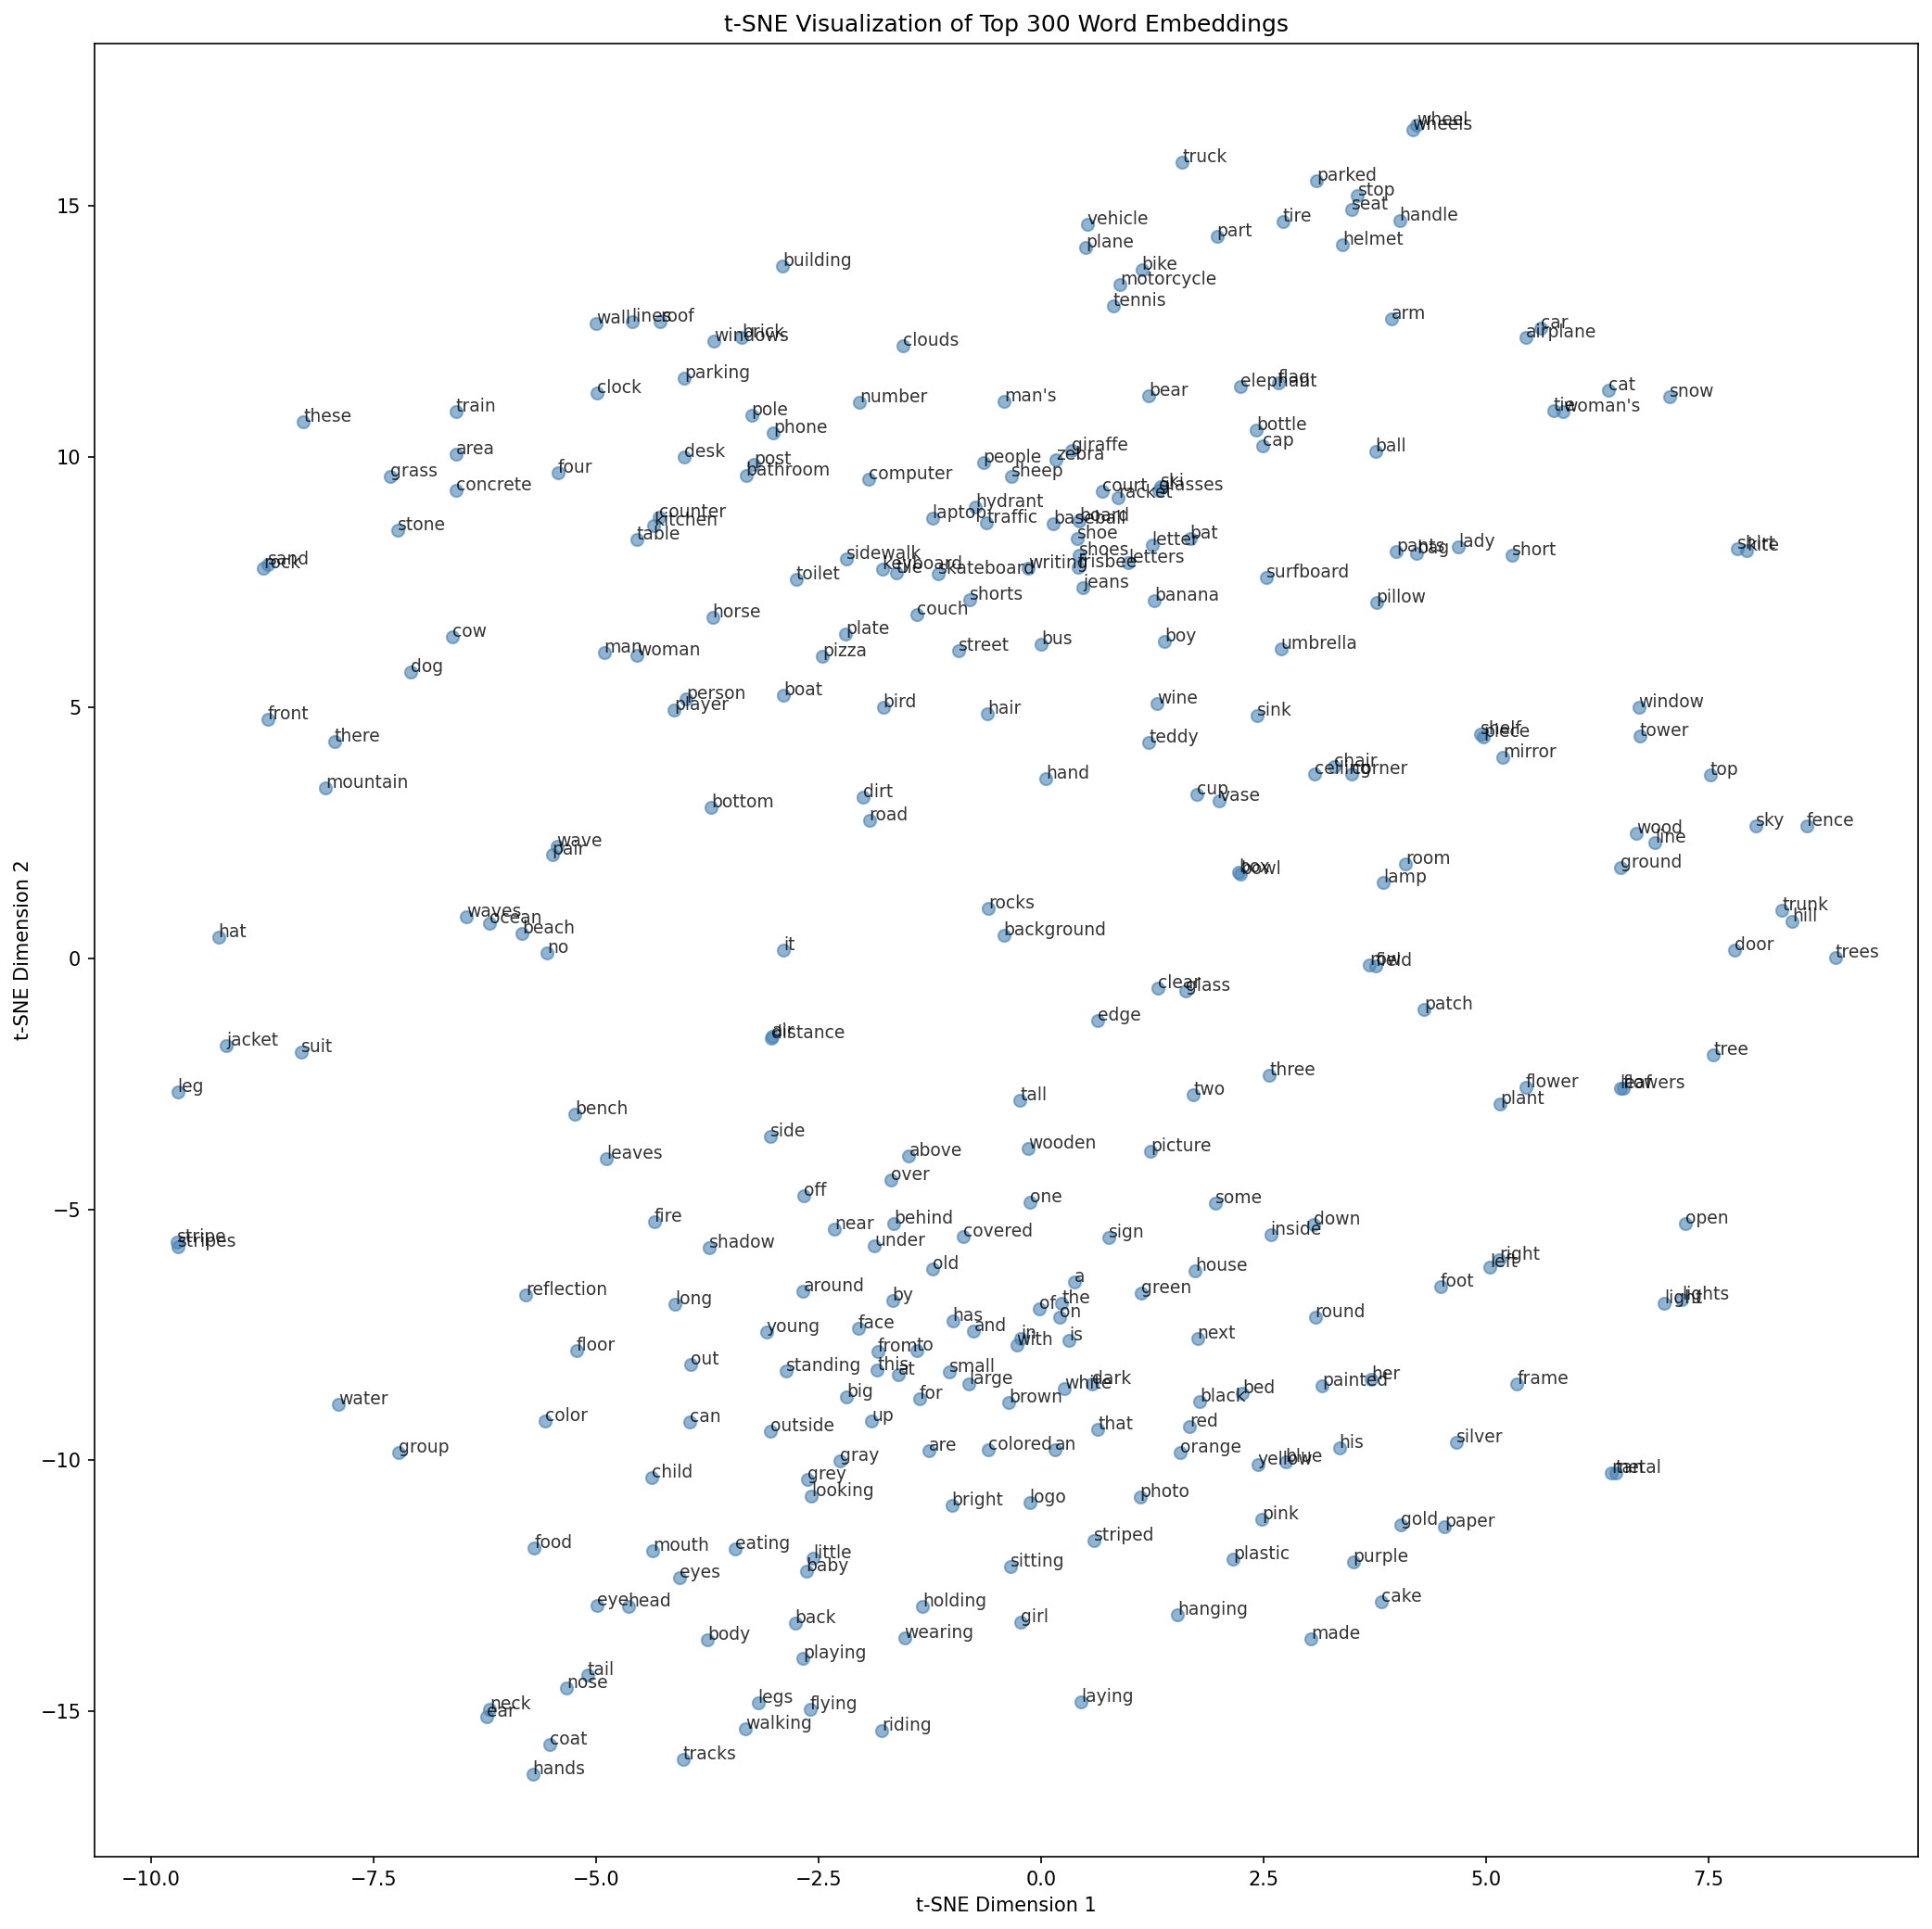

test_contexts_built (lab6.TestSkipGramDataset)
Test that contexts are built correctly. ... ok
test_getitem_returns_triplet (lab6.TestSkipGramDataset)
Test that __getitem__ returns correct format. ... ok
test_pairs_generated (lab6.TestSkipGramDataset)
Test that pairs are generated. ... ok
test_embeddings_initialized (lab6.TestSkipGramModel)
Test that embeddings are initialized. ... ok
test_forward_returns_loss (lab6.TestSkipGramModel)
Test that forward pass returns loss. ... ok
test_get_embeddings_returns_numpy (lab6.TestSkipGramModel)
Test that get_embeddings returns numpy array. ... ok
test_dataset_model_compatibility (lab6.TestIntegration)
Test that dataset output works with model input. ... 


🧪 UNIT TESTS
RUNNING SKIP-GRAM UNIT TESTS

✅ ALL TESTS PASSED!
Total tests run: 7
✅ All tests passed!

💾 SAVING METRICS
✅ Metrics saved to: Model Test Metrics/EMB64_NG5_CS2_BS64.txt


ok

----------------------------------------------------------------------
Ran 7 tests in 0.005s

OK
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_39623/1178721521.py:133: RuntimeWarning: divide by zero encountered in matmul
  sim_matrix = normalized @ normalized.T
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_39623/1178721521.py:133: RuntimeWarning: overflow encountered in matmul
  sim_matrix = normalized @ normalized.T
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_39623/1178721521.py:133: RuntimeWarning: invalid value encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:723: RuntimeWarning: divide by zero encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:723: RuntimeWarning: overflow encountered in matmul
  similarities = (embeddings @ target_vec) / (n

In [4]:
# Load best_model.pth and analyze embeddings
# ============================================================================
from lab6 import analyze_embeddings, visualize_embeddings, SkipGramModel, run_tests, find_similar_words, solve_analogy
import torch
import os
import numpy as np
from IPython.display import Image, display
from datetime import datetime

# --- 0. Specify Model to Test ---
# UPDATE THIS to match your trained model filename
MODEL_EMB = 64
MODEL_NG = 5
MODEL_CS = 2
MODEL_BS = 64

model_path = f'EMB{MODEL_EMB}_NG{MODEL_NG}_CS{MODEL_CS}_BS{MODEL_BS}.pth'

# --- 1. Load Best Model ---
if os.path.exists(model_path):
    print(f"Loading best model from {model_path}...")
    checkpoint = torch.load(model_path)
    nodes = checkpoint['nodes']
    embedding_dim = checkpoint['embedding_dim']
    vocab_size = checkpoint['vocab_size']

    # Reconstruct model to get embeddings
    model = SkipGramModel(vocab_size, embedding_dim)
    model.load_state_dict(checkpoint['model_state_dict'])
    embeddings = model.get_embeddings()

    print(f"✅ Loaded embeddings for {len(nodes):,} words")
    print(f"   Embedding dimension: {embeddings.shape[1]}")
else:
    raise FileNotFoundError(f"{model_path} not found. Please train the model first.")

# --- 2. Check CIFAR-100 Coverage ---
import torchvision
cifar100 = torchvision.datasets.CIFAR100(root='./data', download=True)
cifar_words = set(cifar100.classes)
model_vocab = set(nodes)
cifar_in_model = cifar_words & model_vocab

print(f"\n📊 CIFAR-100 Coverage: {len(cifar_in_model)}/100 words in model")
if len(cifar_in_model) < 100:
    missing = sorted(cifar_words - model_vocab)
    print(f"   Missing: {missing[:10]}..." if len(missing) > 10 else f"   Missing: {missing}")

# --- 3. Qualitative Analysis ---
print("\n" + "="*80)
print("EMBEDDING ANALYSIS")
print("="*80)

# Test with CIFAR-100 words that should be in the model
cifar_test_words = [w for w in ['apple', 'bear', 'bicycle', 'bus', 'cat', 'dog', 
                                 'elephant', 'house', 'mountain', 'train', 'tiger',
                                 'lion', 'whale', 'butterfly', 'snake', 'turtle'] 
                    if w in model_vocab]

analyze_embeddings(
    nodes=nodes,
    embeddings=embeddings,

    # Nearest neighbors - mix of VG words and CIFAR-100 words
    similarity_examples=[
        # CIFAR-100 animals (if present)
        *[w for w in ['bear', 'elephant', 'tiger', 'lion', 'whale', 'butterfly', 
                      'snake', 'turtle', 'rabbit', 'fox', 'wolf'] if w in model_vocab][:6],
        # VG common words
        "man", "woman", "car", "tree", "building", "water",
        # Colors
        "red", "blue", "green", "white",
    ],

    # Analogies
    analogy_examples=[
        ("man", "woman", "boy"),           # → girl?
        ("red", "apple", "yellow"),        # → banana?
        ("dog", "cat", "horse"),           # → cow?
        ("car", "road", "boat"),           # → water?
    ],

    # Semantic clusters - include CIFAR words
    cluster_seeds=[
        *[w for w in ['bear', 'elephant', 'lion', 'tiger', 'cat', 'dog'] if w in model_vocab][:4],
        "car", "bus", "train", "bicycle",
        "red", "blue", "green", "yellow",
    ]
)

# --- 4. t-SNE Visualization ---
print("\n" + "="*80)
print("t-SNE VISUALIZATION")
print("="*80)

tsne_file = "embeddings_tsne.png"
visualize_embeddings(
    nodes,
    embeddings,
    output_file=tsne_file,
    sample_size=min(300, len(nodes)),
    annotate=True
)

if os.path.exists(tsne_file):
    print(f"\n📈 Displaying t-SNE visualization:")
    display(Image(filename=tsne_file, width=800))

# --- 5. Run Unit Tests ---
print("\n" + "="*80)
print("🧪 UNIT TESTS")
print("="*80)

success = run_tests()
if success:
    print("✅ All tests passed!")
else:
    print("❌ Some tests failed.")

# --- 6. Save Metrics to File ---
print("\n" + "="*80)
print("💾 SAVING METRICS")
print("="*80)

# Create directory if it doesn't exist
metrics_dir = "Model Test Metrics"
os.makedirs(metrics_dir, exist_ok=True)

# Compute similarity stats for saving
sample_emb = embeddings[:min(100, len(embeddings))]
norms = np.linalg.norm(sample_emb, axis=1, keepdims=True)
normalized = sample_emb / (norms + 1e-10)
sim_matrix = normalized @ normalized.T
sim_values = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]

# Get nearest neighbors for key words
similarity_test_words = [
    *[w for w in ['bear', 'elephant', 'tiger', 'lion', 'whale', 'butterfly', 
                  'snake', 'turtle', 'rabbit', 'fox', 'wolf'] if w in set(nodes)][:6],
    "man", "woman", "car", "tree", "building", "water",
]

# Get analogy results
analogy_tests = [
    ("man", "woman", "boy"),
    ("red", "apple", "yellow"),
    ("dog", "cat", "horse"),
    ("car", "road", "boat"),
]

# Build metrics file content
metrics_filename = f"EMB{MODEL_EMB}_NG{MODEL_NG}_CS{MODEL_CS}_BS{MODEL_BS}.txt"
metrics_path = os.path.join(metrics_dir, metrics_filename)

with open(metrics_path, 'w') as f:
    f.write("="*60 + "\n")
    f.write("MODEL TEST METRICS\n")
    f.write("="*60 + "\n\n")
    
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Model file: {model_path}\n\n")
    
    f.write("--- HYPERPARAMETERS ---\n")
    f.write(f"Embedding Dim:    {MODEL_EMB}\n")
    f.write(f"Num Negatives:    {MODEL_NG}\n")
    f.write(f"Context Size:     {MODEL_CS}\n")
    f.write(f"Batch Size:       {MODEL_BS}\n\n")
    
    f.write("--- MODEL INFO ---\n")
    f.write(f"Vocabulary Size:  {vocab_size}\n")
    f.write(f"Embedding Shape:  {embeddings.shape}\n\n")
    
    f.write("--- CIFAR-100 COVERAGE ---\n")
    f.write(f"Words in model:   {len(cifar_in_model)}/100\n")
    if len(cifar_in_model) < 100:
        missing = sorted(cifar_words - model_vocab)
        f.write(f"Missing words:    {missing}\n")
    f.write("\n")
    
    f.write("--- SIMILARITY STATS (100 word sample) ---\n")
    f.write(f"Mean:             {sim_values.mean():.4f}\n")
    f.write(f"Std:              {sim_values.std():.4f}\n")
    f.write(f"Min:              {sim_values.min():.4f}\n")
    f.write(f"Max:              {sim_values.max():.4f}\n\n")
    
    f.write("--- NEAREST NEIGHBORS ---\n")
    for word in similarity_test_words:
        if word in nodes:
            similar = find_similar_words(word, nodes, embeddings, top_k=5)
            neighbors = ", ".join([f"{w}({s:.3f})" for w, s in similar])
            f.write(f"{word}: {neighbors}\n")
    f.write("\n")
    
    f.write("--- ANALOGY TESTS (a:b :: c:?) ---\n")
    for a, b, c in analogy_tests:
        results = solve_analogy(a, b, c, nodes, embeddings, top_k=3)
        if results:
            answers = ", ".join([f"{w}({s:.3f})" for w, s in results])
            f.write(f"{a}:{b} :: {c}:? → {answers}\n")
        else:
            f.write(f"{a}:{b} :: {c}:? → (words not in vocabulary)\n")
    f.write("\n")
    
    f.write("--- UNIT TESTS ---\n")
    f.write(f"Passed: {'Yes' if success else 'No'}\n")
    
    f.write("\n" + "="*60 + "\n")

print(f"✅ Metrics saved to: {metrics_path}")
